In [4]:
import seaborn as sns
import pandas as pd

from matplotlib import pyplot as plt

data = pd.read_csv('perf_forward.csv')

In [5]:
data.columns

Index(['Unnamed: 0', 'impl', 'context_length', 'time_taken_ms',
       'memory_used_mb'],
      dtype='object')

<Axes: xlabel='context_length', ylabel='time_taken_ms'>

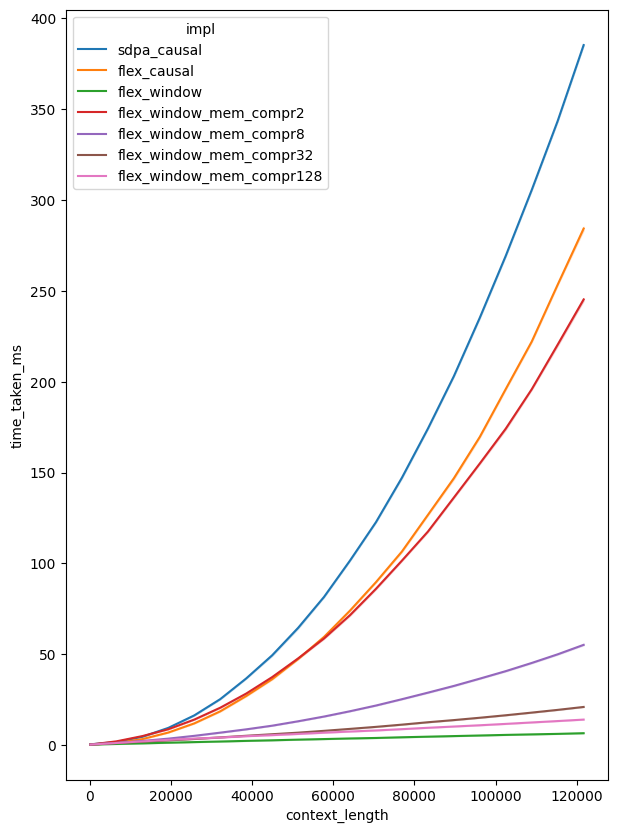

In [10]:
plt.figure(figsize=(7,10))
sns.lineplot(data, x='context_length', y='time_taken_ms', hue='impl')

<Axes: xlabel='context_length', ylabel='memory_used_mb'>

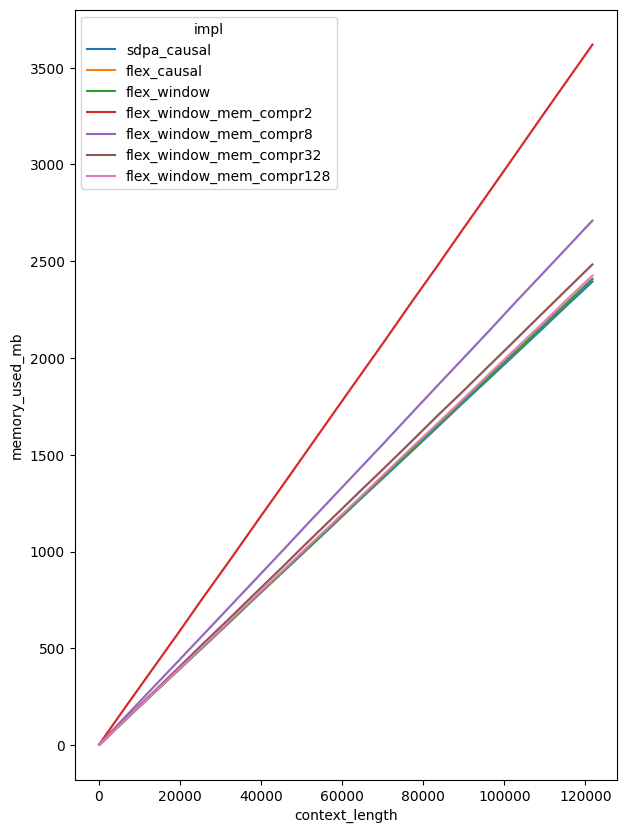

In [12]:
plt.figure(figsize=(7,10))
sns.lineplot(data, x='context_length', y='memory_used_mb', hue='impl')

In [99]:
from pathlib import Path
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


runs_dir = Path('runs')

all_metrics = []

for run_dir in runs_dir.iterdir():
    metrics = pd.read_csv(run_dir / 'metrics.csv')
    all_metrics.append(metrics)

all_metrics = pd.concat(all_metrics)

In [100]:

all_metrics = all_metrics.sort_values(by='seen_tokens')
for run_name in all_metrics['run_name'].unique():
    subset = (all_metrics['run_name'] == run_name)
    all_metrics.loc[subset, 'train_time_h'] = all_metrics.loc[subset, 'time_delta_s'].cumsum() / 60 / 60
    all_metrics.loc[subset, 'window_size'] = int(run_name.split('_')[2])

In [101]:
all_metrics['algo_type'] = None
all_metrics.loc[all_metrics['run_name'].str.startswith('mem'), 'algo_type'] = 'mem'
all_metrics.loc[all_metrics['run_name'].str.startswith('window'), 'algo_type'] = 'window'

In [102]:
all_metrics.columns

Index(['step', 'seen_tokens', 'time_delta_s', 'run_name', 'lr_mult',
       'train_loss', 'val_loss', 'train_time_h', 'window_size', 'algo_type'],
      dtype='object')

(0.8, 1.0)

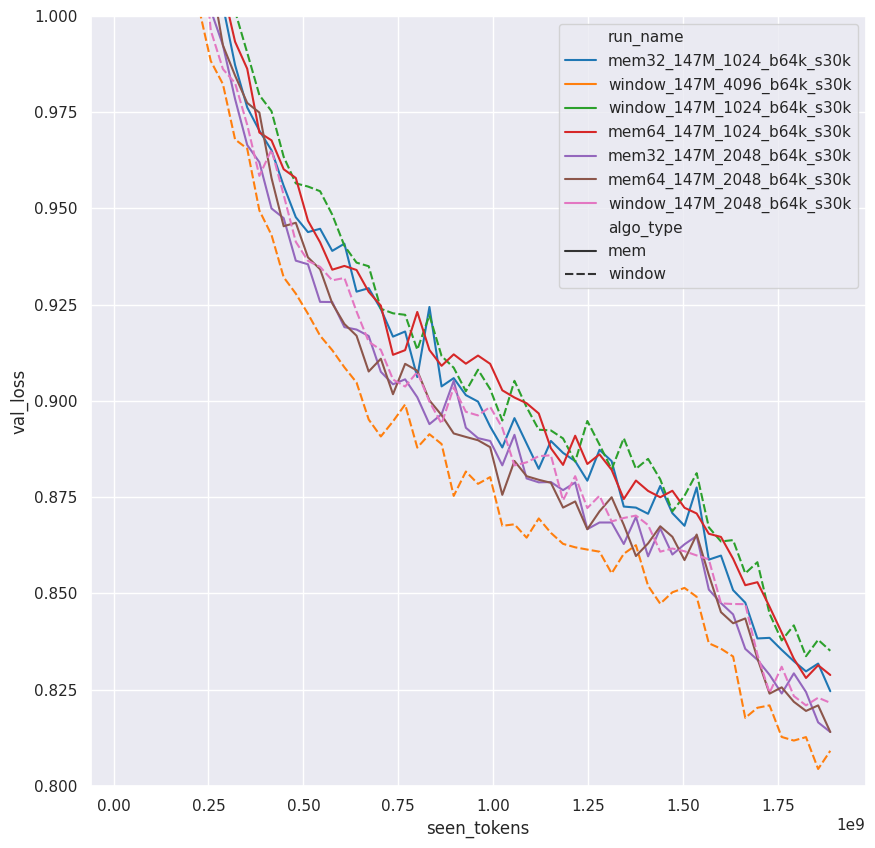

In [103]:
plt.figure(figsize=(10, 10))
sns.lineplot(all_metrics[~pd.isna(all_metrics['val_loss'])], x='seen_tokens', y='val_loss', hue='run_name', style='algo_type')
plt.ylim((0.8, 1.0))

(0.8, 0.95)

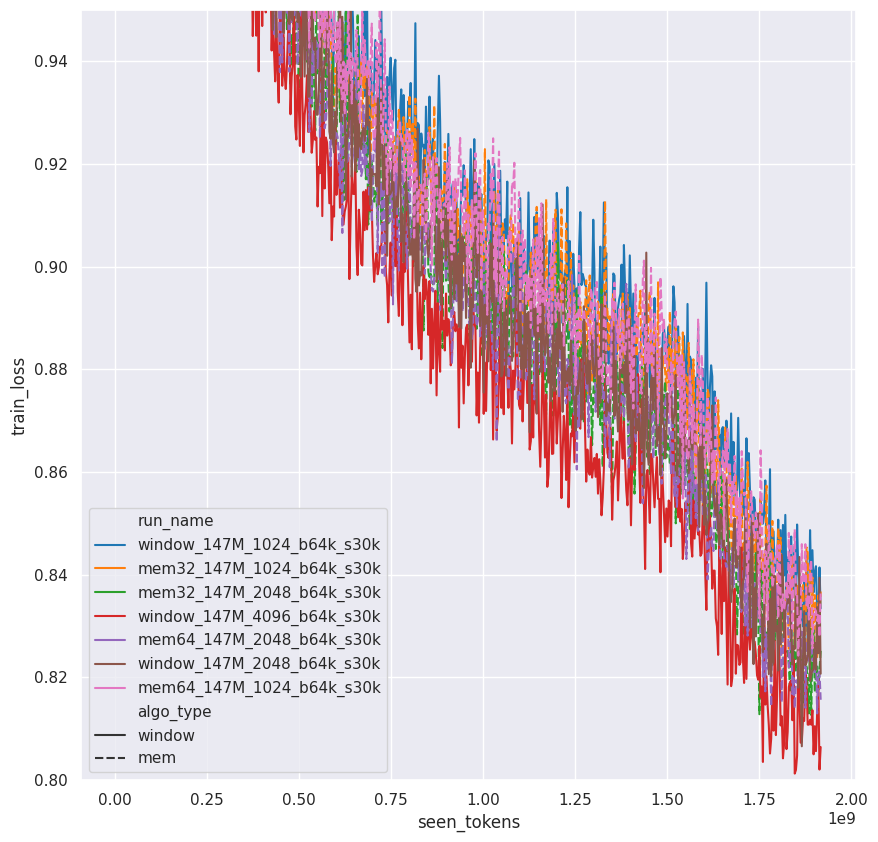

In [104]:
plt.figure(figsize=(10, 10))
sns.lineplot(all_metrics[~pd.isna(all_metrics['train_loss'])], x='seen_tokens', y='train_loss', hue='run_name', style='algo_type')
plt.ylim((0.8, 0.95))

(0.8, 0.95)

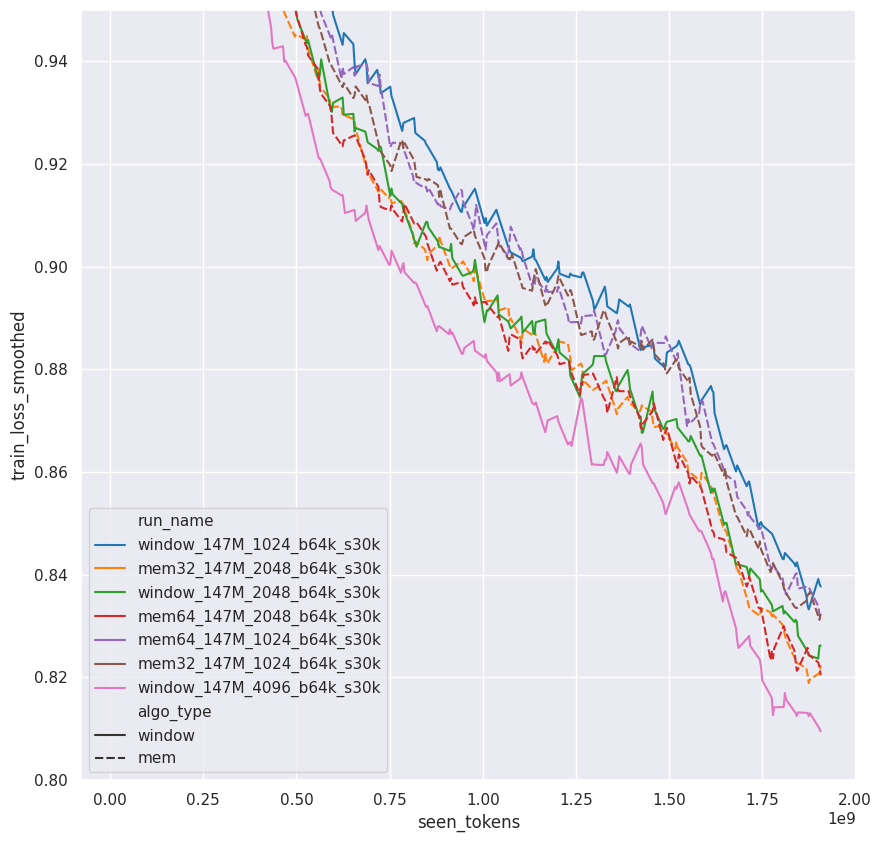

In [105]:
window = 8
all_metrics = all_metrics.sort_values(by='seen_tokens')
for run_name in all_metrics['run_name'].unique():
    subset = (all_metrics['run_name'] == run_name)
    all_metrics.loc[subset, 'train_loss_smoothed'] = all_metrics.loc[subset, 'train_loss'].rolling(window=window, center=True).sum() / window
plt.figure(figsize=(10, 10))
sns.lineplot(all_metrics[~pd.isna(all_metrics['train_loss_smoothed'])], x='seen_tokens', y='train_loss_smoothed', hue='run_name', style='algo_type')
plt.ylim((0.8, 0.95))

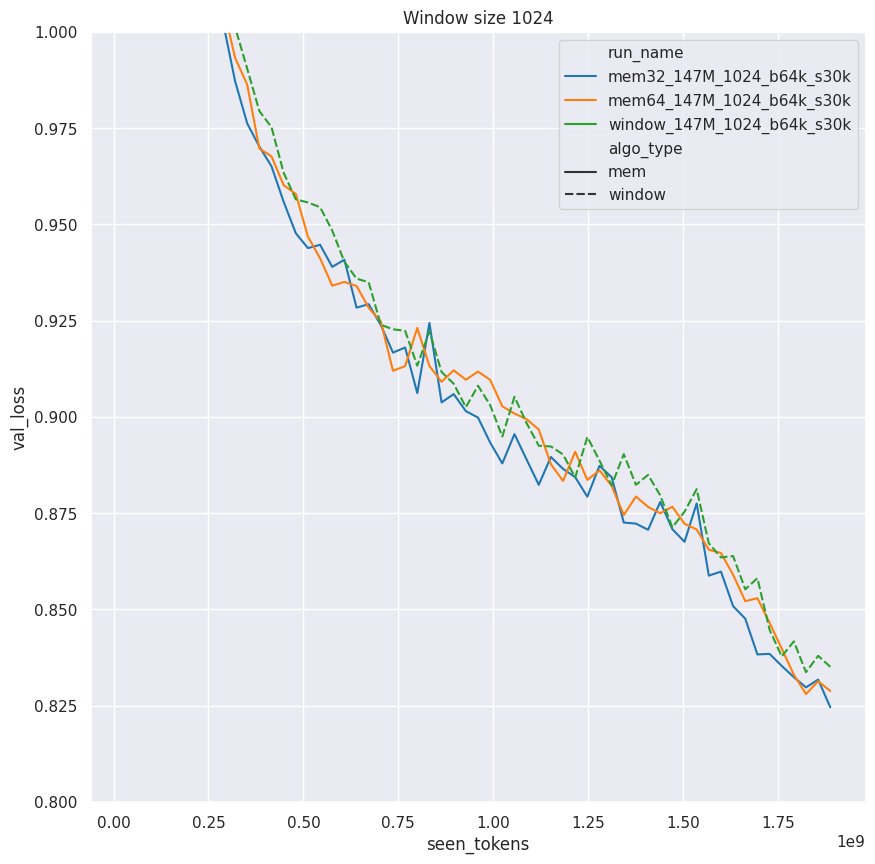

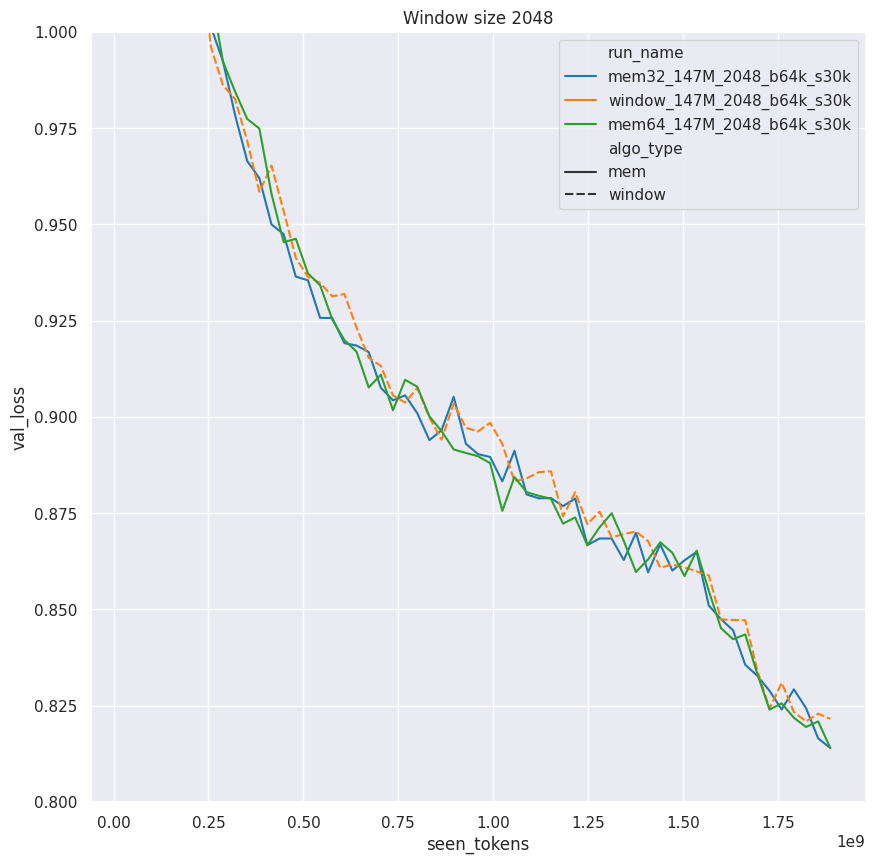

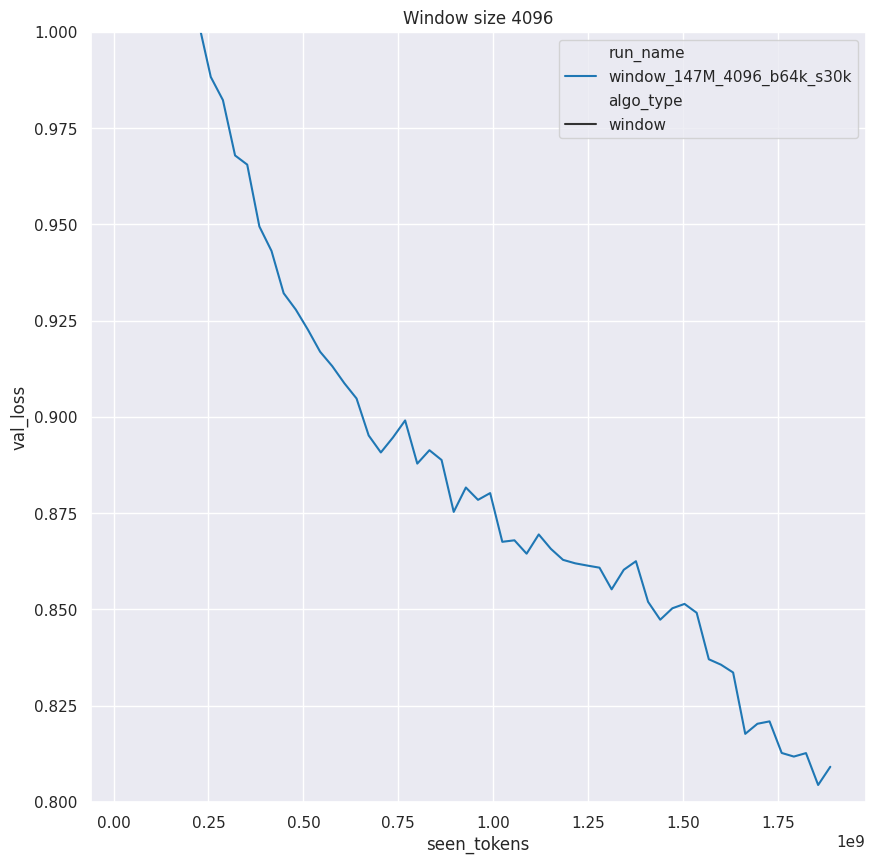

In [106]:
for window_size in all_metrics['window_size'].unique():
    subset = (all_metrics['window_size'] == window_size) & ~pd.isna(all_metrics['val_loss'])
    
    plt.figure(figsize=(10, 10))
    sns.lineplot(all_metrics[subset], x='seen_tokens', y='val_loss', hue='run_name', style='algo_type')
    plt.ylim((0.8, 1.0))
    plt.title(f'Window size {int(window_size)}')

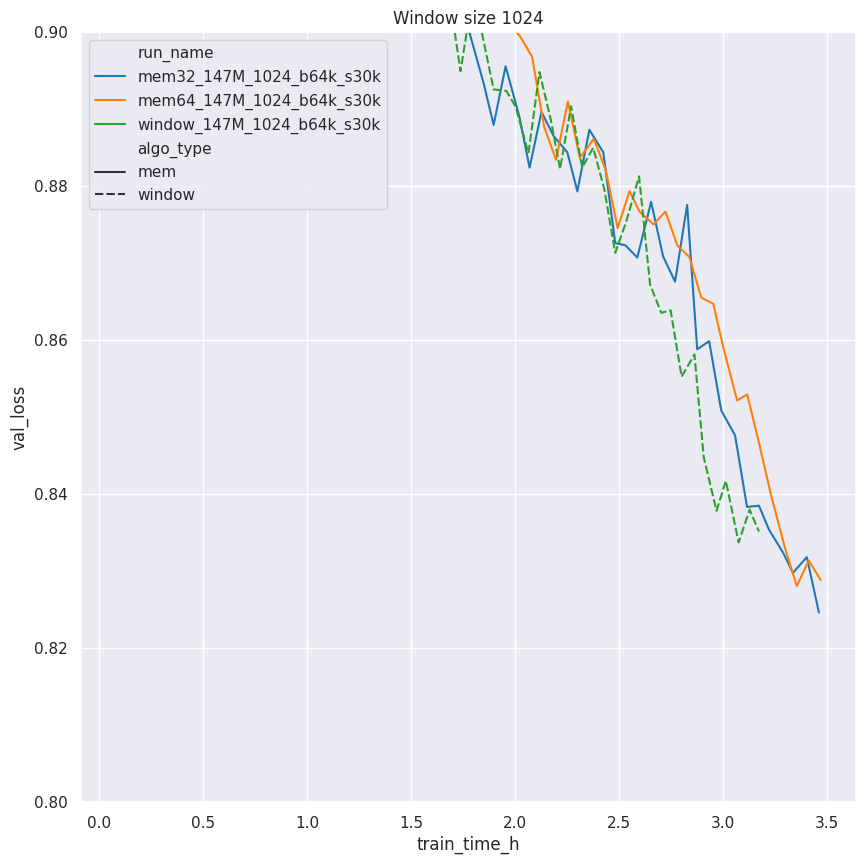

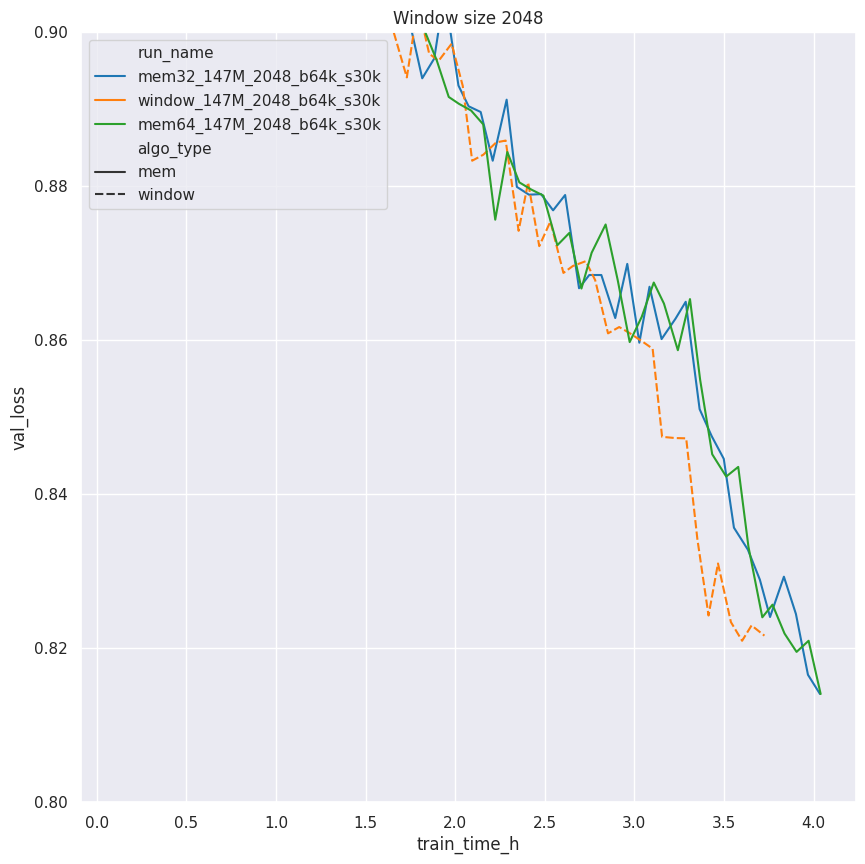

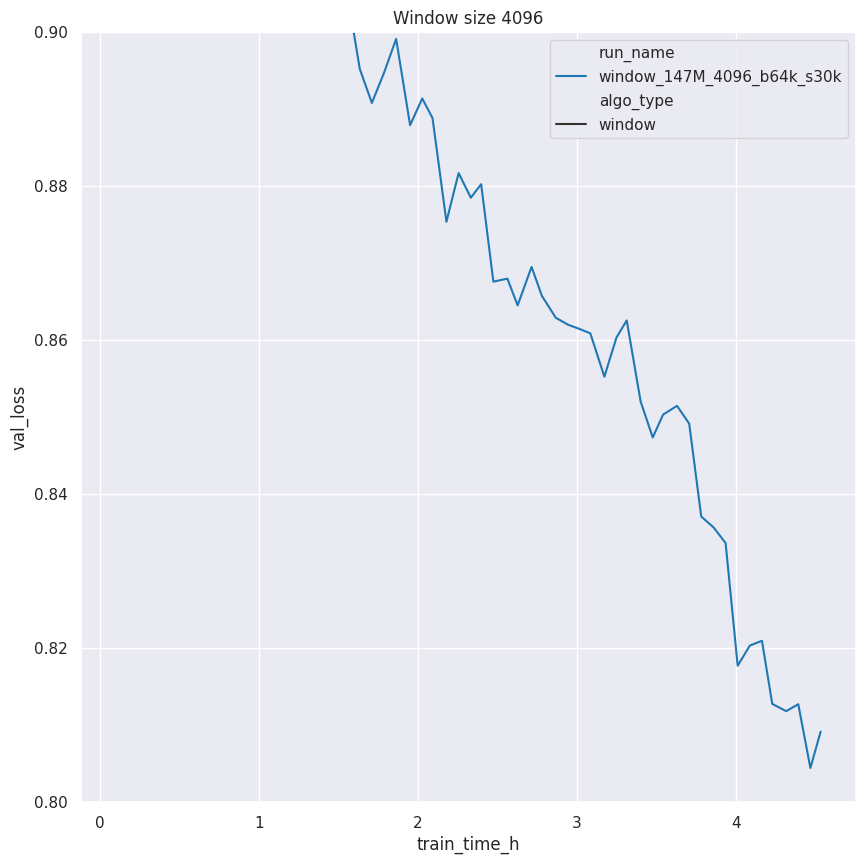

In [111]:
for window_size in all_metrics['window_size'].unique():
    subset = (all_metrics['window_size'] == window_size) & ~pd.isna(all_metrics['val_loss'])

    plt.figure(figsize=(10, 10))
    sns.lineplot(all_metrics[subset], x='train_time_h', y='val_loss', hue='run_name', style='algo_type')
    plt.ylim((0.8, 0.9))
    plt.title(f'Window size {int(window_size)}')